У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [42]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

In [6]:
df = pd.read_csv('yulu_rental.csv')

In [7]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

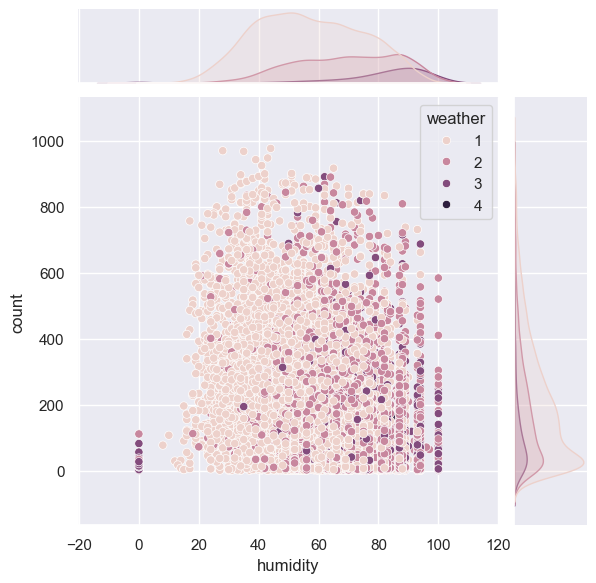

In [9]:
sns.jointplot(data = df, x = 'humidity', y = 'count', hue = 'weather');

Спостереження з графіка:
1. Данні по вологості сконцентровані в діапазоні 20-100%
2. Більшість випадків оренди зосереджено при високих значеннях вологості
3. Чітко простежується вплів погоди - при відносно гарній погоді(значення 1 і 2 з колонки weather) оренда велосипедів максимальна
4. Додаткові гістограмі показують, що більшість даних сконцентровані в середньому та високому діапазоні вологості, а оренди зосереджені у діапазоні 0–400.
Корись для бізнеса:
1. Профілактічне обслуговування техніки краще планувати на погані погодні умови(значення 3 і 4 з колонки weather)
2. Додаткові ресурси(велосипеди) у ясні дні потрібно тріматі в звпасі по всім відділенням

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

In [11]:
df_season = df.query('season == 1 or season == 2 ')
df_season.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


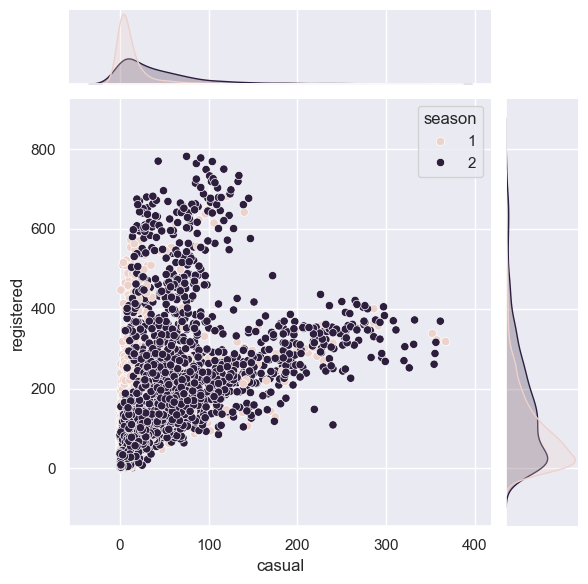

In [13]:
sns.jointplot(data = df_season, x = 'casual', y = 'registered', hue = 'season', alpha = 0.2);

Спостереження по графіку:
1. Очевидно, що кількість зареєстрованих користувачів (registered) значно більша за кількість неформальних користувачів (casual), що може свідчити про те, що більшість людей використовують систему оренди велосипедів на постійній основі.
2. За кольоровими відтінками, можна помітити, що сезон має вплив на поведінку користувачів - на графіку більшість точок кольору, що відповідає сезону літо
3. Найбільша кількість зареестрованіх корістувачів, що корістуваліся послугамі сервісу сонцентрована в діапазоні 0-400, тоді як незареестрованих - в діапазоні 0-120(приблизно).
4. 	Весняна гістограма має зміщення вліво та високий пік, що вказує на більшу концентрацію оренд велосипедів в низькому діапазоні кількості користувачів. Це може свідчити про те, що в весною попит на оренду велосипедів ще не такий високий, і оренда зростає поступово з часом
5. Літня гістограма показує рівномірний розподіл оренд з меншим піком на низьких значеннях, що вказує на збільшену кількість користувачів, які орендують велосипеди більш регулярно, але з меншою частотою на одного користувача в порівнянні з весною.
Висновки:
Це може бути корисним для планування бізнес-процесів, оскільки рівномірний попит означає, що компанія повинна забезпечити доступність велосипедів протягом всього літа, а не лише в пікові періоди.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


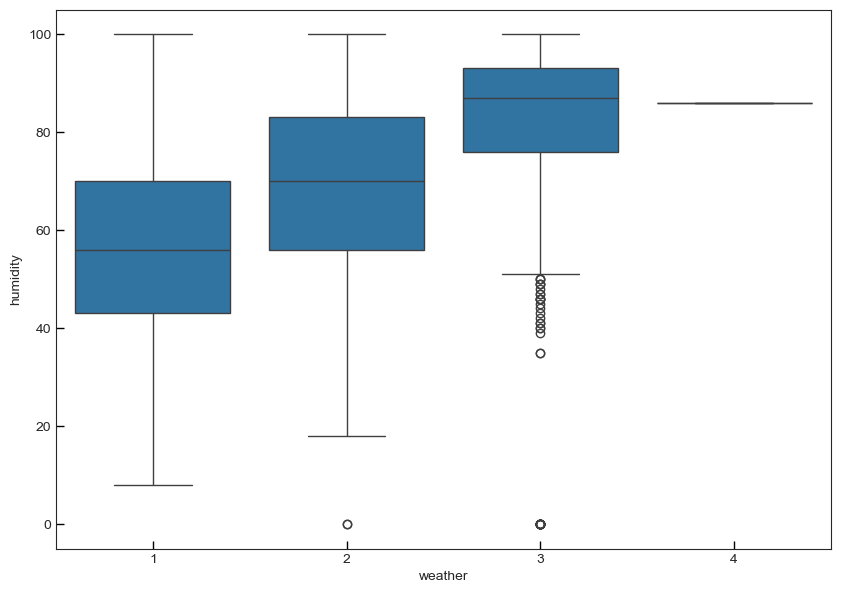

In [35]:
plt.figure(figsize=(10, 7))
sns.set_style("white")
sns.boxplot(data = df[['humidity','weather']], x = 'weather', y = 'humidity')
ax = plt.gca()  
ax.tick_params(
    axis='both',          
    which='major',       
    direction='out',      
    length=6,            
    width=1,              
    color='black' )
ax.xaxis.set_ticks_position('bottom')  
ax.yaxis.set_ticks_position('left')   
plt.show();

4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

In [40]:
df_all = df[['casual','registered','count','workingday']]

<Figure size 300x300 with 0 Axes>

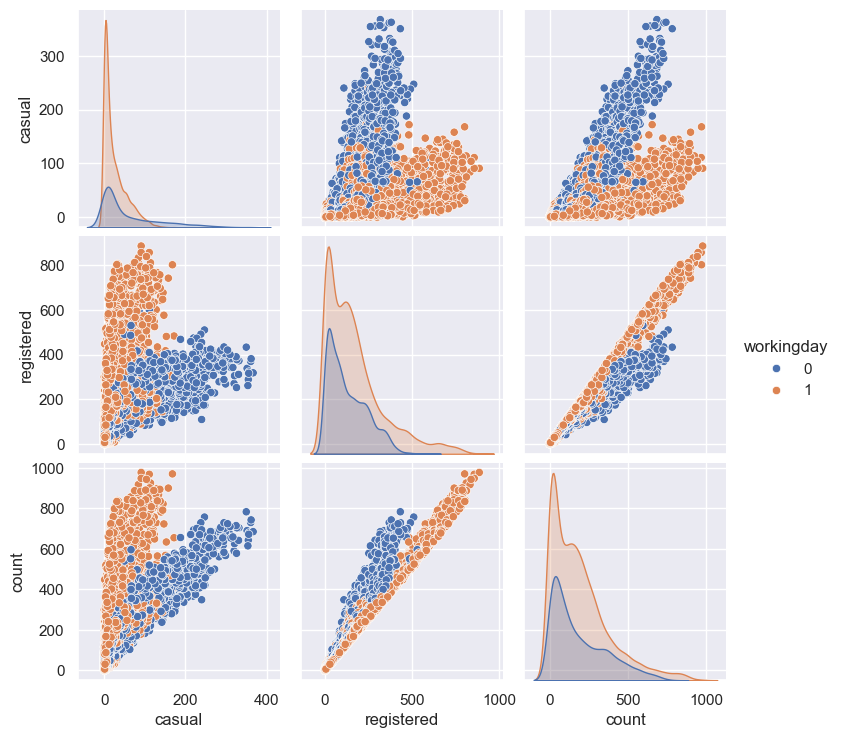

In [43]:
plt.figure(figsize=(3,3))
sns.pairplot(data=df_all, hue='workingday');

Загальний опис:
1. Графік для незареєстрованих користувачів показують значну варіативність у кількості велосипедів, взятих на прокат, як у робочі, так і в святкові дні. Це вказує на те, що їхнє використання сервісу є менш регулярним і більш випадковим, що зумовлено непередбачуваними поїздками, наприклад, для відпочинку чи випадкових потреб. У святкові дні ця варіативність може бути навіть більшою через підвищену активність у випадкових поїздках. Загалом, така поведінка робить попит на велосипеди серед незареєстрованих користувачів важчим для прогнозування.
2. Графіки для зареєстрованих користувачів демонструють більш чітку лінійну залежність між кількістю взятих на прокат велосипедів та кількістю зареєстрованих користувачів, що вказує на їх більш регулярне використання сервісу. Попит серед зареєстрованих користувачів є передбачуваним і стабільним, що дозволяє краще планувати доступність велосипедів, особливо в робочі дні. У святкові дні ця залежність зберігається, хоча вона може бути менш виражена, що може свідчити про те, що навіть у святкові дні зареєстровані користувачі зберігають більш організовану та систематичну поведінку у використанні велосипеда.

Окремо висновки про вихідні дні:
1. Якщо говорити окремо про вихідні дні, з графіків можна зробити висновок, що на вихідні дні кількість незареєстрованих користувачів, які бажають взяти велосипед на прокат, збільшується в порівнянні з робочими днями. Це свідчить про те, що вільний час у вихідні сприяє більшій активності серед випадкових користувачів, які не є постійними користувачами сервісу.
2. Натомість, серед зареєстрованих користувачів спостерігається зворотна тенденція: на вихідні дні кількість прокатів зменшується в порівнянні з робочими днями. Це може вказувати на те, що зареєстровані користувачі більше використовують велосипедний сервіс для щоденних поїздок у будні, а у вихідні вони можуть обирати інші варіанти для відпочинку чи проведення часу.

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [48]:
df['datetime'] = pd.to_datetime(df['datetime'])

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [56]:
df['date'] = df.datetime.dt.date

In [59]:
df_viz = df[['date', 'registered', 'casual']].groupby('date').sum()
df_viz

,registered,casual
date,,
2011-01-01,654,331
2011-01-02,670,131
2011-01-03,1229,120
2011-01-04,1454,108
2011-01-05,1518,82
...,...,...
2012-12-15,4280,767
2012-12-16,3248,538
2012-12-17,4373,212


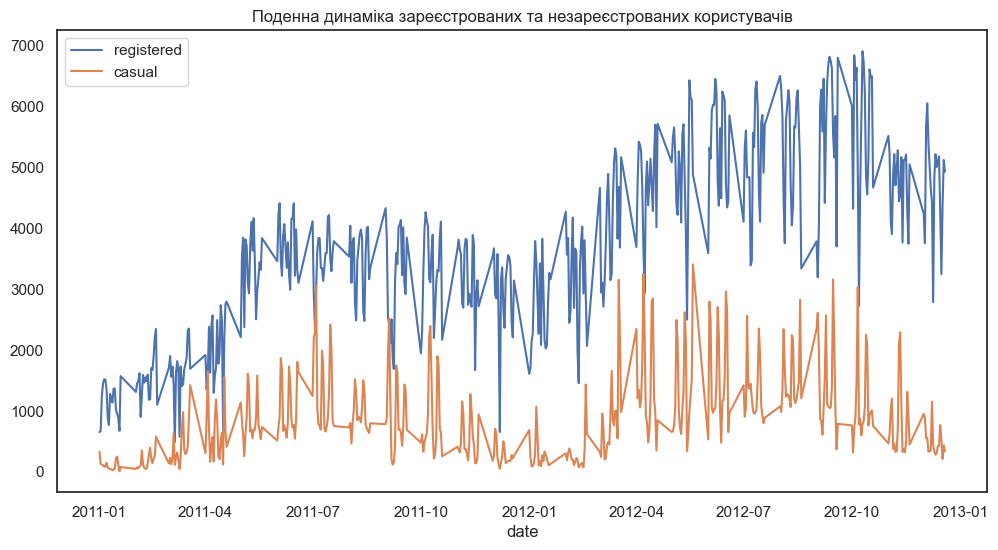

In [65]:
df_viz.plot(figsize=(12, 6), title='Поденна динаміка зареєстрованих та незареєстрованих користувачів');